In [1]:
import kauri as kr
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from math import exp

SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 12, 13, 14

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [2]:
def step(rk, h, t0, y0, y, f, N):
    if len(y) > 1:
        raise

    m = rk.elementary_weights_map()
    m1 = m & kr.minus
    m2 = m & kr.plus

    bs = kr.BSeries(y, f, m, 5)
    bs1 = kr.BSeries(y, f, m1, 5)
    bs2 = kr.BSeries(y, f, m2, 5)

    t = np.linspace(t0, t0+h, N)
    ys = []
    for i in range(N):
        ys.append(float(bs(y0, i * 0.1 / N)[0]))

    y_minus = []
    for i in range(N):
        y_minus.append(float(bs1(y0, i * 0.1 / N)[0]))

    plt.plot(t, ys, color = "black")
    plt.plot(t, y_minus, color = "black", linestyle = "dashdot")
    min_ = min(y_minus[-1], ys[-1])
    max_ = max(y_minus[-1], ys[-1])
    print(min_, max_)
    plt.vlines(t[-1], min_, max_, linestyle = "dotted", color = "black")

    plt.scatter([t[-1]], [ys[-1]], marker = "x", color = "black")
    plt.scatter([t[-1]], [y_minus[-1]], marker = "x", color = "black")
    return t0 + h, ys[-1]

1.99 3.6820442724625
3.9601 7.327268102200375
7.880599 14.581263523378746
15.682392010000001 29.016714411523704


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


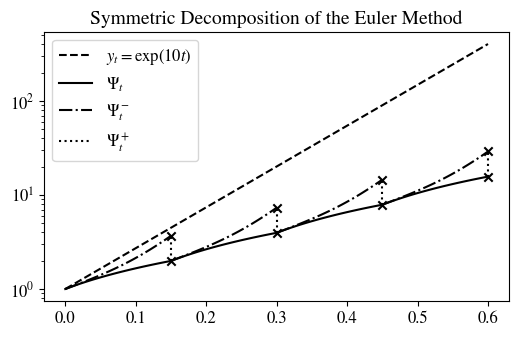

In [3]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["figure.figsize"] = (6,3.5) #(5.25 * 1.25,3 * 1.25)

y1, y2 = sp.symbols('y1 y2')
y = sp.Matrix([y1])

# Vector field f(y): R^2 -> R^2
A=10#1.3
#f = sp.Matrix([A*y1 ** 2])
f = sp.Matrix([A*y1])

rk = kr.euler

t = np.linspace(0, 0.6, 100)

C = 1

#true = [C / (1 - A*C * x) for x in t]
true = [exp(A*x) for x in t]
plt.plot(t, true, linestyle="--", color = "black")

t0, y0 = 0, C
for i in range(4):
    t0, y0 = step(rk, 0.15, t0, [y0], y, f, 100)

plt.yscale('log')
plt.title("Symmetric Decomposition of the Euler Method")
plt.legend([r"$y_t = \exp(10t)$", r"$\Psi_t$", r"$\Psi^-_t$", r"$\Psi^+_t$"])
plt.savefig("Euler_decomp.eps")
plt.savefig("Euler_decomp.pdf")
plt.show()